# ✨Dataset Estudiantes✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>

**Estudiantes** 
   * Sandra Marcela Guerrero
   * Juan David Delgado
   * Wilmer Alexander Escobar

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Carga de datos

In [5]:
#Cargar archivos
datos = pd.read_csv("estudiantes_final.csv", sep=",")

In [6]:
datos

,Error1,Error2,Error3,Aceptado,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


# Visualización de datos

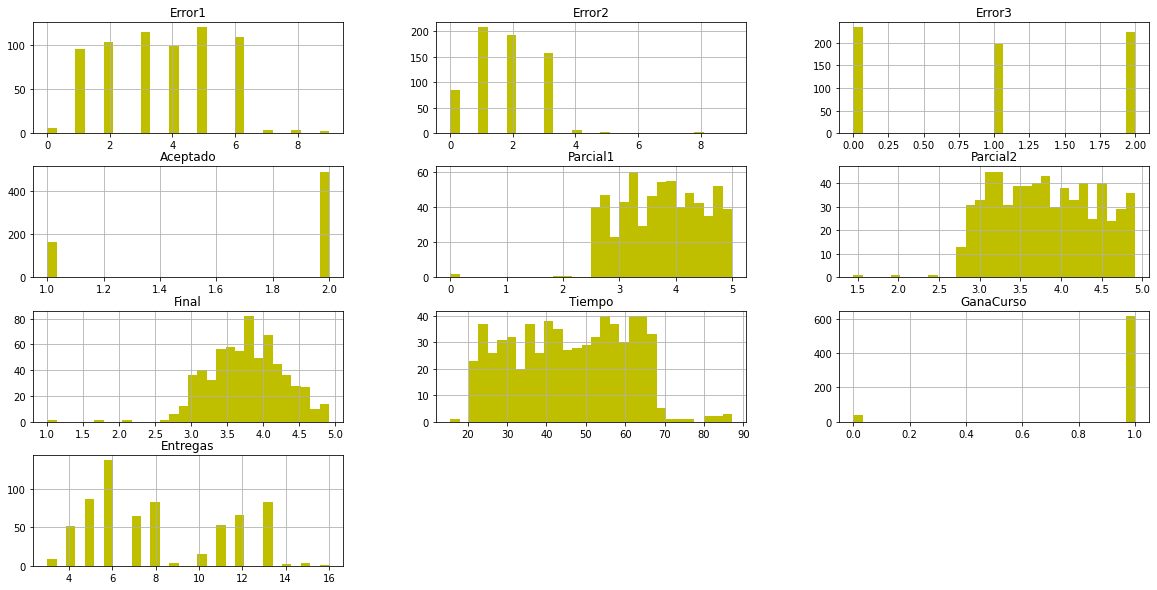

In [7]:
datos.hist(bins=30,figsize=(20,10), color = 'y')
plt.show()

## Eliminamos las columnas que no se utilizan
* Para un primer analisis trabajamos con las columnas 'Envios' y 'Final'

In [10]:
#datos.describe()
print(datos.columns)

Index(['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2',
       'Final', 'Tiempo', 'GanaCurso', 'Entregas'],
      dtype='object')


In [11]:
datos = datos.drop([
'Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2',
       'Tiempo', 'GanaCurso'
], axis=1)
datos

,Final,Entregas
0,3.0000,6.0
1,4.1840,5.0
2,3.0385,6.0
3,4.0790,8.0
4,2.9785,7.0
...,...,...
652,4.4242,13.0
653,3.2775,6.0
654,3.9360,5.0
655,3.8613,13.0


## Se eliminan los datos nulos

In [12]:
datos = datos.dropna() #eliminar datos (filas) NaN
datos

,Final,Entregas
0,3.0000,6.0
1,4.1840,5.0
2,3.0385,6.0
3,4.0790,8.0
4,2.9785,7.0
...,...,...
652,4.4242,13.0
653,3.2775,6.0
654,3.9360,5.0
655,3.8613,13.0


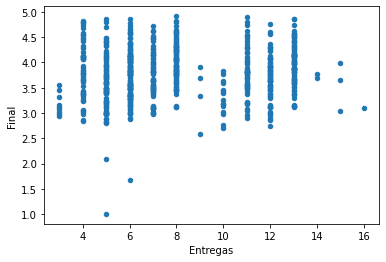

In [15]:
datos.plot.scatter(x='Entregas', y='Final');

# Creación del modelo

In [16]:
X = np.array(datos.drop(['Final'],1)) #Quita etiqueta Tiempo al nuevo dataset X
Y = np.array(datos['Final']) #pone la etiqueta Tiempo al nuevo dataset Y

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

# Validación del modelo

In [19]:
regr.score(X,Y)

0.00899546782015681

# Regresion lineal

In [20]:
from sklearn import metrics
# The coefficients: 1 is perfect prediction
print('Coefficients: %.2f' % regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_pred))
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error: %.2f'% np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Coefficients: 0.02
Coefficient of determination: -0.00
Mean Absolute Error: 0.41
Mean Squared Error: 0.26
Root Mean Squared Error: 0.51


# Reporte de resultados

## Datos de entrenamiento

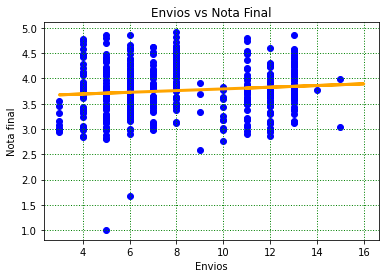

In [21]:
plt.scatter(X_train, Y_train,  color='blue')
plt.plot(X_test, Y_pred, color='orange', linewidth=3)
plt.title('Envios vs Nota Final')
plt.xlabel('Envios')
plt.ylabel('Nota final')
plt.grid(color='g', linestyle='dotted', linewidth=1)
plt.show()

## Datos de prueba

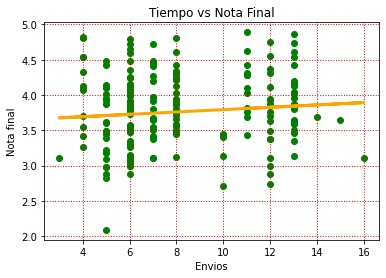

In [22]:
plt.scatter(X_test, Y_test,  color='green')
plt.plot(X_test, Y_pred, color='orange', linewidth=3)
plt.title('Tiempo vs Nota Final')
plt.xlabel('Envios')
plt.ylabel('Nota final')
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

# Clasificación de nuevos registros

In [23]:
X_new = pd.DataFrame({'Tiempo': [2]})
regr.predict(X_new).astype(float)
print('Nota promedio  %.2f ' % regr.predict(X_new).astype(float))

Nota promedio  3.66 
